I want to determine the best neighborhood, and we always have to see safety wise how that can be determined. Crime Rate Time!! Where is the lowest crime rate? If you lived in Pittsburgh your whole life, you know where to avoid, especially during nighttime. But, if your new to PA, I got you. Metric is based off non-traffic citations, cause cmon.

Data preview:
   _id       PK       CCR GENDER RACE   AGE            CITEDTIME  \
0    1  1078081  16157849      M    B  29.0  2016-08-22T23:45:00   
1    2  1078082  16157849      M    W  21.0  2016-08-22T23:45:00   
2    3  1078083  16159579    NaN  NaN   NaN  2016-08-25T11:10:00   
3    4  1078084  16159780      M    B  22.0  2016-08-25T16:42:00   
4    5  1078085  16161591      F    W  22.0  2016-08-28T00:58:00   

                           INCIDENTLOCATION  \
0  200 Block N DITHRIDGE ST PITTSBURGH, PA    
1  200 Block N DITHRIDGE ST PITTSBURGH, PA    
2                NORTH PARK PITTSBURGH, PA    
3  7200 Block FRANKSTOWN AV PITTSBURGH, PA    
4      6100 Block BERLIN WY PITTSBURGH, PA    

                                            OFFENSES         NEIGHBORHOOD  \
0  5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...        North Oakland   
1  5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...        North Oakland   
2                            5505 Public Drunkenness     Allegh

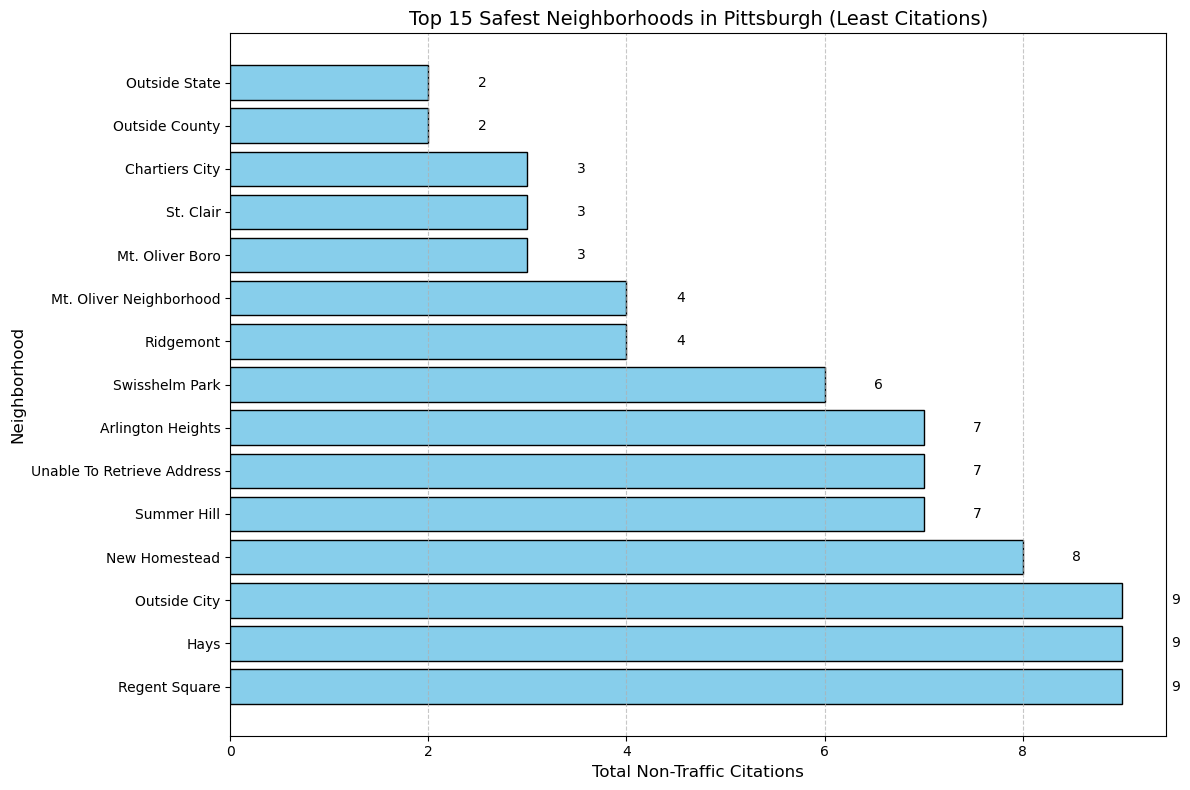

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the legendary CSV file 
try:
    df = pd.read_csv('non_traffic_citations.csv')
except FileNotFoundError:
    print("Error: 'non_traffic_citations.csv' not found. Please check the file path.")
    raise

# Preview the data and list available columns
print("Data preview:")
print(df.head(), "\n")
print("Columns in the dataset:")
print(df.columns.tolist(), "\n")

# Convert CITEDTIME column to datetime
if 'CITEDTIME' in df.columns:
    df['CITEDTIME'] = pd.to_datetime(df['CITEDTIME'], errors='coerce')
    print("Converted 'CITEDTIME' to datetime.")
else:
    print("Error: 'CITEDTIME' column not found, goofy.")

# Check for missing values in NEIGHBORHOOD column
if 'NEIGHBORHOOD' in df.columns:
    missing_neighborhood = df['NEIGHBORHOOD'].isna().sum()
    print(f"Missing values in 'NEIGHBORHOOD': {missing_neighborhood}")
else:
    print("Error: 'NEIGHBORHOOD' column not found in the dataset.")

# Group data by neighborhood and count the number of citations
if 'NEIGHBORHOOD' in df.columns:
    citations_by_nbhd = df.groupby('NEIGHBORHOOD').size().reset_index(name='TotalCitations')
    print("Citation counts by Neighborhood:")
    print(citations_by_nbhd.sort_values(by='TotalCitations'), "\n")
else:
    print("Cannot group data because 'NEIGHBORHOOD' column is missing.")
    citations_by_nbhd = pd.DataFrame()

# Filter for the top 15 safest areas 
if not citations_by_nbhd.empty:
    safest_areas = citations_by_nbhd.sort_values(by='TotalCitations', ascending=True).head(15)
    
    plt.figure(figsize=(12, 8))
    
    # Make that horizontal bar chart one TIME!
    bars = plt.barh(safest_areas['NEIGHBORHOOD'], safest_areas['TotalCitations'],
                    color='skyblue', edgecolor='black')
    
    plt.xlabel('Total Non-Traffic Citations', fontsize=12)
    plt.ylabel('Neighborhood', fontsize=12)
    plt.title('Top 15 Safest Neighborhoods in Pittsburgh (Least Citations)', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Invert y-axis so that the safest appears at the top
    plt.gca().invert_yaxis()
    
    # Annotate each bar with corresponding total citation count
    for bar in bars:
        width = bar.get_width()  # number of citations
        y_pos = bar.get_y() + bar.get_height() / 2  # vertical center of the bar
        plt.text(width + 0.5, y_pos, str(int(width)), va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print("No data available for plotting.")
 

It looks like the South Side Flats is a literal WARZONE! Stay away from there. I am surprised that my hometown Mckees Rocks is not the worst place to live in. But, you should experience low crime rates in areas like **St. Clair**, **Mt. Oliver**, **Chartiers City**, **Ridgemont** and anywhere outside of the trenches like Downtown Pittsburgh, and Oakland areas.